# Feature Preprocessing

## Feature Transformation

In [3]:
#Check for all details of the dataset.
import numpy as np
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv(r'C:\Users\pc\Documents\python internshala\Housing price.csv')

In [5]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [6]:
df.shape

(21613, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
ID                                           21613 non-null int64
Date House was Sold                          21613 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21613 non-null int64
No of Bathrooms                              21609 non-null float64
Flat Area (in Sqft)                          21604 non-null float64
Lot Area (in Sqft)                           21604 non-null float64
No of Floors                                 21613 non-null float64
Waterfront View                              21613 non-null object
No of Times Visited                          21613 non-null object
Condition of the House                       21613 non-null object
Overall Grade                                21613 non-null int64
Area of the House from Basement (in Sqft)    21610 non-null float64
Basement Area (in

In [8]:
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [9]:
sum(df.isnull().sum())

33

This value must be 0 after cleaning the data.

In [10]:
#Selecting already cleaned data(outliers and missing values are already treated).

df1=pd.read_csv(r'C:\Users\pc\Documents\python internshala\Raw_Housing_Prices3.csv')

In [11]:
df1.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [14]:
sum(df1.isnull().sum())

0

## Feature transformation of continuous variable

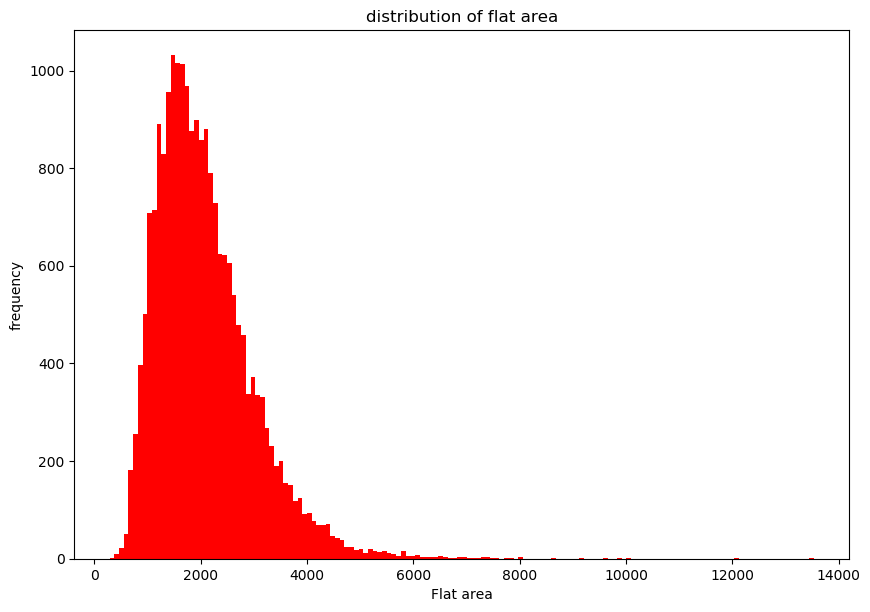

In [15]:
#visualize skewness of flat area.
plt.figure(figsize=(10,7), dpi=100)
plt.hist(df1['Flat Area (in Sqft)'], bins=150, color='red')
plt.xlabel('Flat area')
plt.ylabel('frequency')
plt.title('distribution of flat area')
plt.show()

Flat area is right skewed in nature so we will use feature transformation by taking log or nth root of flat area to transform it into normal distribution.

In [16]:
def log_transform (sample_data):
    return np.log(sample_data)

In [18]:
df1['Transform Flat Area']= df1['Flat Area (in Sqft)'].map(log_transform)

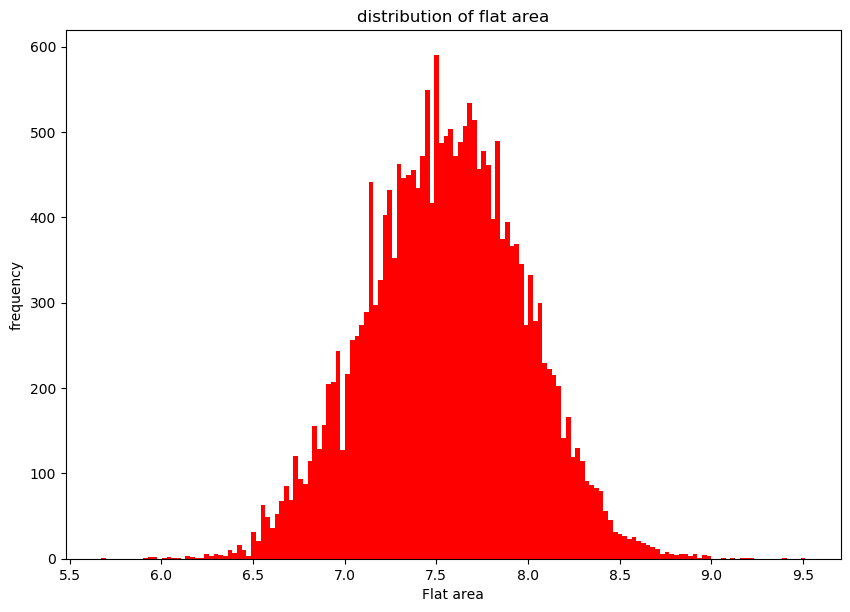

In [19]:
#Check transformed flat area skewness.
plt.figure(figsize=(10,7), dpi=100)
plt.hist(df1['Transform Flat Area'], bins=150, color='red')
plt.xlabel('Flat area')
plt.ylabel('frequency')
plt.title('distribution of flat area')
plt.show()

We desired this normal distribution so that R2 will increase further what we have obtained before feature transformation. 

## Feature Transformation of Categorical variable

In [20]:
#Using Label-enconding to transform 'condition of the house'.
#Lable-encoding is used for feature for which order is already known.

label_encoded=df1['Condition of the House']
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [21]:
#Perform label encoding

label_encoded=label_encoded.map({'Bad':1,
                                'Okay':2,
                                'Fair':3,
                                'Good':4,
                                'Excellent':5})
label_encoded.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

All categories have converted into numerical values.

## Binning

In [23]:
#Binning implemented on both Cat. & Cont. variables.
#binning for cat. var have done already[bin zipcode].
#binning of sparse category.
#In 'condition of the house' visualize the categories.

mean=[]

for i in df1['Condition of the House'].unique():
    mean.append(df1['Sale Price'][df1['Condition of the House']==i].mean())


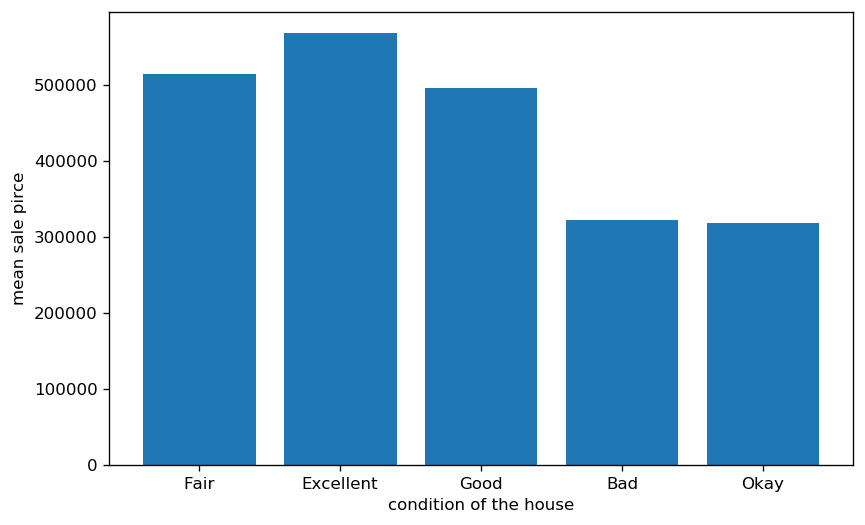

In [28]:
plt.figure( figsize=(8,5), dpi=120)

plt.bar(df1['Condition of the House'].unique(), mean)
plt.xlabel('condition of the house')
plt.ylabel('mean sale pirce')
plt.show()

Here bad & okay categories are similar and sparse too so we can bin 'condition of the house' in 3 categories only.

In [32]:
#Binning classes of 3 for condition of the house.

mapping={'Excellent':'Excellent',
        'Good':'Good',
        'Fair':'Good',
        'Okay':'Okay',
        'Bad':'Okay'}
df1['Condition of the House']=df1['Condition of the House'].map(mapping)

In [33]:
mean=[]

for i in df1['Condition of the House'].unique():
    mean.append(df1['Sale Price'][df1['Condition of the House']==i].mean())


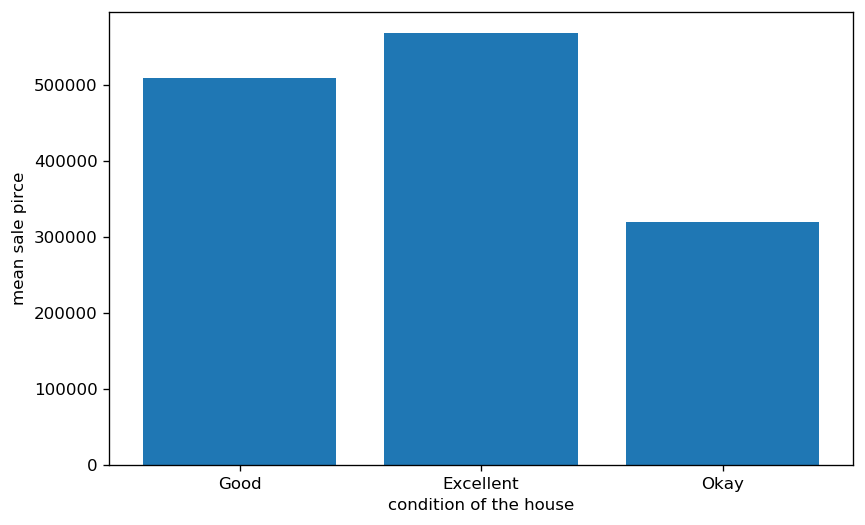

In [34]:
plt.figure( figsize=(8,5), dpi=120)

plt.bar(df1['Condition of the House'].unique(), mean)
plt.xlabel('condition of the house')
plt.ylabel('mean sale pirce')
plt.show()

In [37]:
#Binning of continuous var. (age of house) 

len(df1['Age of House (in Years)'].unique())

116

In [36]:
df1['Age of House (in Years)'].max()

118

In [38]:
df1['Age of House (in Years)'].min()

3

In [40]:
def age_of_house(x):
    if x< 10:
        x='new'
    elif x< 50:
        x='old'
    else:
        x='very old'
    return x

In [41]:
#Binning
cat_house_age=df1['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

Further we can convert these 3 binning values in dummy variables.Sometime binning of cont. var. results in loss of info. 

Binning resulted cont. age of house var. in 3 categories(increased dimensionality) , now dummy var. will transform it into 2 cat.(to reduce dimensionality).

## Feature extraction

In [43]:
#extraction for date house was sold.

time=pd.DatetimeIndex(df1['Date House was Sold'])
df1['year_sold']=time.year
df1['month_sold']=time.month
df1['weekday_sold']=time.weekday_name
df1['date_sold']=time.days_in_month

df1[['year_sold', 'month_sold', 'weekday_sold', 'date_sold']].head()

,year_sold,month_sold,weekday_sold,date_sold
0,2017,10,Saturday,31
1,2017,12,Thursday,31
2,2016,2,Monday,29
3,2017,12,Thursday,31
4,2016,2,Monday,29
